<a href="https://colab.research.google.com/github/gopaps/MachineLearning/blob/main/week%202/week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification model:
CitarumWater.csv

In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive agar dapat mengakses file
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset dari Google Drive
# Sesuaikan path file dataset dengan lokasi yang ada di Google Drive Anda
data = '/content/drive/My Drive/dataset/CitarumWater.csv'

In [ ]:
# Membaca dataset menggunakan pandas
data  = pd.read_csv(data)

In [ ]:
print(cita.head())

   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  


In [ ]:
# 2. Preprocessing Data
# Menghapus simbol derajat pada kolom 'Temp' dan mengubahnya menjadi tipe float
data['Temp'] = data['Temp'].str.replace('°C', '').astype(float)

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = data[['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']]
y = data['Class']


In [ ]:
# Membagi dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 3. Membangun model menggunakan Logistic Regression
# Membuat pipeline untuk normalisasi dan regresi logistik
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))


In [ ]:
# Melatih model menggunakan data latih
model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# Memprediksi target pada data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # probabilitas untuk kelas positif


In [ ]:
# 4. Evaluasi Model
# Menghitung Akurasi
accuracy = accuracy_score(y_test, y_pred)


In [ ]:
# Menghitung Precision
precision = precision_score(y_test, y_pred, average='weighted')


In [ ]:
# Menghitung Recall
recall = recall_score(y_test, y_pred, average='weighted')


In [ ]:
# Menghitung F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')


In [ ]:
# Menghitung AUC
auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')


In [ ]:
# Menampilkan metrik evaluasi
print(f'Akurasi: {accuracy:.3f}')
print(f'Presisi: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-Score: {f1:.3f}')
print(f'AUC: {auc:.3f}')


Akurasi: 0.958
Presisi: 0.958
Recall: 0.958
F1-Score: 0.958
AUC: 0.998


In [ ]:
# 5. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=2)


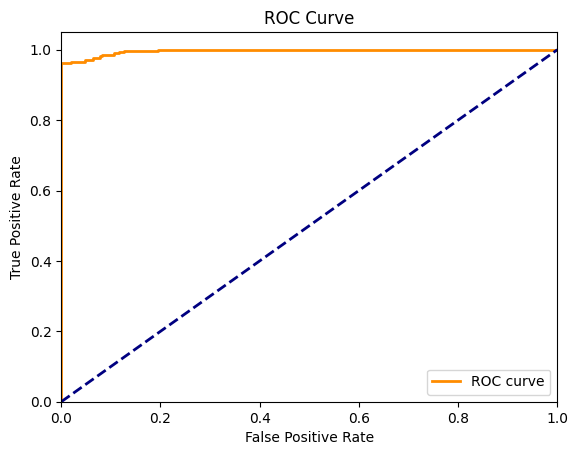

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Regression model:
FinancialMarket.csv


In [ ]:
# Mount Google Drive ke Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Impor library yang dibutuhkan
import pandas as pd

# Membaca dataset dari Google Drive
file_path = '/content/drive/My Drive/dataset/FinancialMarket.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
data.head()


,x,combined_data
0,0.00000,0.003073
1,0.01001,0.033492
2,0.02002,-0.027269
3,0.03003,0.176319
4,0.04004,-0.006027


In [ ]:
# Langkah 3: Pemodelan Regresi Linear dan Basis Fungsi
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Memisahkan fitur dan target
X = data[['x']]
y = data['combined_data']

In [ ]:

# Membagi data menjadi set pelatihan dan set pengujian (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Membuat model regresi linear biasa
linear_model = LinearRegression()

In [ ]:
# Melatih model regresi linear biasa
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Memprediksi menggunakan model regresi linear biasa
y_pred_linear = linear_model.predict(X_test)


In [ ]:
# Menghitung metrik evaluasi untuk model regresi linear biasa
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)


In [ ]:
# Membuat model regresi dengan basis fungsi (polinomial derajat 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [ ]:
# Membuat dan melatih model regresi linear dengan basis fungsi
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
# Memprediksi menggunakan model regresi dengan basis fungsi
y_pred_poly = poly_model.predict(X_poly_test)


In [ ]:
# Menghitung metrik evaluasi untuk model regresi dengan basis fungsi
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)


In [ ]:
# Membandingkan hasil
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression (Degree 2)'],
    'MSE': [mse_linear, mse_poly],
    'RMSE': [rmse_linear, rmse_poly],
    'R-Squared': [r2_linear, r2_poly]
})


In [ ]:
# Menampilkan hasil perbandingan
comparison_df

,Model,MSE,RMSE,R-Squared
0,Linear Regression,9.401378,3.066167,0.67816
1,Polynomial Regression (Degree 2),1.348093,1.161074,0.95385


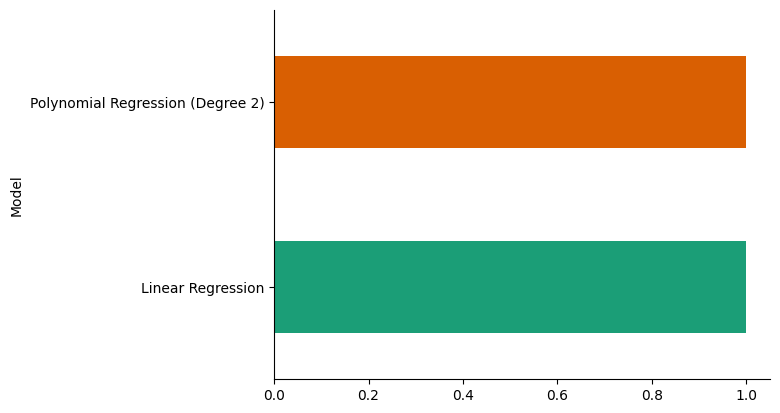

In [ ]:
# @title Model

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

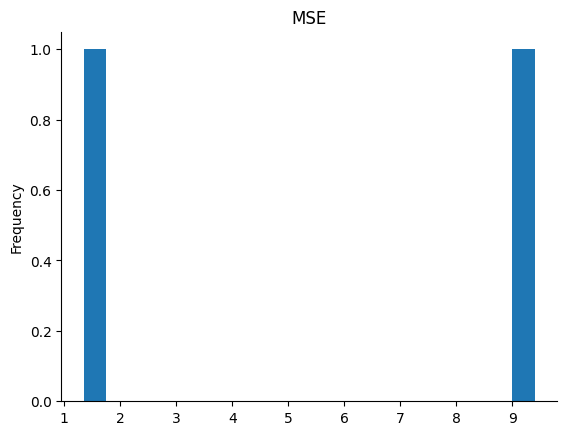

In [ ]:
# @title MSE

from matplotlib import pyplot as plt
comparison_df['MSE'].plot(kind='hist', bins=20, title='MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

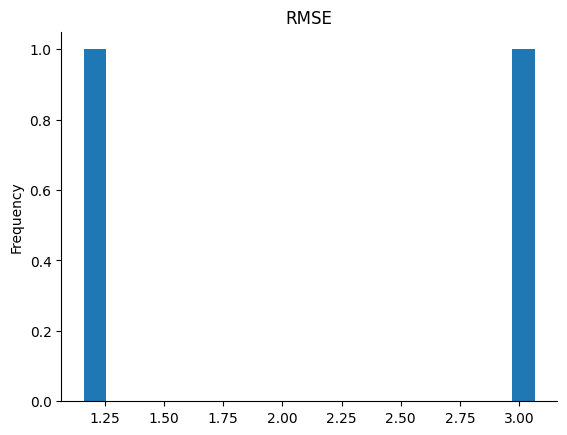

In [ ]:
# @title RMSE

from matplotlib import pyplot as plt
comparison_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

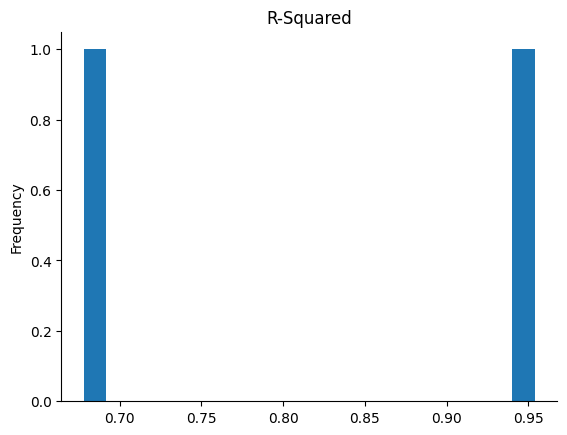

In [ ]:
# @title R-Squared

from matplotlib import pyplot as plt
comparison_df['R-Squared'].plot(kind='hist', bins=20, title='R-Squared')
plt.gca().spines[['top', 'right',]].set_visible(False)